### Keras 시작하기
* 라이브러리 불러오기
* 신경망을 위한 데이터 이해
* MNIST 데이터 셋
* 넘파이를 활용한 텐서 조작

### 01. 라이브러리 임포트
* 설치 : pip install keras

In [1]:
import keras
import tensorflow as tf
keras.__version__

'2.4.3'

In [2]:
print(tf.__version__)

2.3.1


### 02. 신경망을 위한 데이터 이해
* Tensor 자료형
* 스칼라 : 하나의 숫자만 담고 있는 텐서를 스칼라라고 한다.
 * 0차원 텐서, 0D텐서

In [3]:
import numpy as np
x = np.array(12)
print(x.ndim)
x

0


array(12)

### 벡터(1D 텐서)
* 숫자의 배열을 벡터(vector)또는 1D텐서라고 부른다. 1D 텐서는 딱 하나의 축을 가진다.

In [4]:
x = np.array([10,20,30,40,50])
print(x.ndim)
x

1


array([10, 20, 30, 40, 50])

* 위의 값은 5개의 원소를 가지고 있으므로 5차원 벡터라 부른다.

### 행렬(2D 텐서)
* 벡터의 배열을 행렬(matrix) 또는 2D텐서라 부른다. 행렬에는 2개의 축이 있다. 보통 행과 열이라 한다.

In [5]:
x = np.array([ [11,21,31],
               [12,22,32],
               [13,23,33] ])
print(x.ndim)
x

2


array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

### 3D텐서와 고차원 텐서
* 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석할 수 있는 3D텐서가 만들어진다.

In [6]:
x = np.array([
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ],
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ],
              [ [11,21,31],
               [12,22,32],
               [13,23,33] ]
             ])
print(x.ndim)
x

3


array([[[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]],

       [[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]],

       [[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]]])

* 이와같이 3D텐서들을 하나의 배열로 합치면 4D텐서가 된다
* 딥러닝에서는 보통 0D에서 4D까지의 텐서를 다룬다.

### 03. MNIST 데이터 셋

In [7]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
print(train_images.ndim)

3


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_images.dtype

dtype('uint8')

### 04 이미지를 출력해 보기

In [11]:
import matplotlib.pyplot as plt

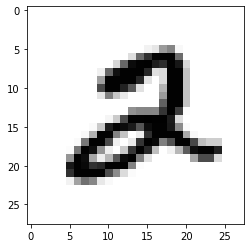

In [12]:
image = train_images[5]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

### 05 넘파이를 활용한 텐서 조작
 * 배열에 있는 특정 원소를 일부 선택하는 것을 슬라이싱(slicing)이라 한다.

In [13]:
my_slice = train_images[10:50]
print(my_slice.shape)

(40, 28, 28)


In [14]:
my_slice = train_images[10:50, :, :]  # 이전것과 동일
print(my_slice.shape)

(40, 28, 28)


In [15]:
my_slice = train_images[10:50, 0:28, 0:28]  # 이전것과 동일
print(my_slice.shape)

(40, 28, 28)


### 이미지의 오른쪽 아래 14 x 14 픽셀 선택

In [16]:
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


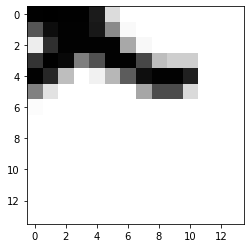

In [17]:
image = my_slice[5]
plt.imshow(image, cmap=plt.cm.binary)
plt.show()

### 06 배치 데이터

* 딥러닝 모델에서는 한 번에 전체 데이터를 처리하지 않는다.
* 그대신 데이터를 작은 배치(batch)로 나눈다.
* 구체적으로 말하면 MNIST 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같다.

In [18]:
batch = train_images[ : 128]

In [19]:
# 다음 배치
batch = train_images[128:256]

In [20]:
# n번째 배치
# batch = train_images[128 * n:128 * (n+1)]

### 07 텐서의 실제 사례

#### 벡터 데이터(sample.features)크기의 2D텐서
#### 시계열 데이터 또는 시퀀스 (sequence) 데이터 : (samples, timesteps, features)크기의 3D텐서
#### 이미지(samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D텐서
#### 동영상 : (samples, frames, height, width, channels) 또는 (sampels, frames, channels, height, width)크기의 5D텐서

### 이미지 데이터 
 * 이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어진다.
 * 흑백이미지의 channel의 차원 크기는 1입니다.
 * 256 x 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1)크기의 텐서
 * 256 x 256 크기의 컬러 이미지에 대한 128개의 배치는 (128, 256, 256, 3)크기의 텐서
    

### 비디오 데이터 

* 프레임의 연속 (frames, height, width, color_depth)의 4D텐서
* 여러 비디오의 배치(samples, frames, height, width, color_depth)의 5D텐서로 저장.

### 60초 짜리 144 x 256유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 된다.
 * 클립을 4개 가진 배치는 (4, 240, 144, 256, 3) 크기의 텐서에 저장.

### 08 텐서의 크기 변환

In [21]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
train_images = train_images.reshape((60000, 28*28))
train_images.shape

(60000, 784)

In [23]:
x = np.array( [[0. , 1.], 
               [2. , 3.],
               [4. , 5.]])
print(x.shape)

x1 = x.reshape((6,1))
x1.shape

(3, 2)


(6, 1)

### REF
* 케라스 창시자에게 배우는 딥러닝